<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Greedy</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Problema 2: Repostatge de vehicles (Òptim) (2p)</h1>

Modifiqueu l'algorisme anterior per a que la solució sigui òptima. <br>
       En aquest cas, només haureu d'omplir el dipòsit amb els litres necessaris per a arribar a la benzinera més propera amb un cost inferior a la que estem actualment. <br>
       Comproveu que la solució que obteniu amb aquest algorisme és inferior a la solució del Problema 1.
    </p>    
   
</div>

Exemple:<br>
       Suposem que tenim benzineres als punts 10, 11, 13, el destí està al punt 14 i els preus són 0.5, 0.4, 0.3 respectivament. La capacitat del cotxe és de 10L.<br>
       <ol>
           <li> Comprovem quines benzineres són assolibles: Només podem arribar a la benzinera del km.10 que té cost 0.5€/L.
           <li> Abans de decidir quants litres omplim, mirem a quines benzineres podríem arribar. Podríem arribar al km.11, al km.13 i al km.14 (destinació).
           <li> Com que la benzinera del km.11 val 0.4€/L i 0.4<0.5, només omplim amb els litres necessaris per arribar a aquesta benzinera (1L).
           <li> Ens movem a aquesta benzinera i repetim el procés.                                                    
       </ol>

In [2]:
def refill_prices_optim(K, stations, prices):
    """
    Repostatge òptim de vehicles amb costos. 
    
    Params
    ======
    :K: dipòsit del vehicle
    :stations: llista de benzineres. L'últim element és el destí.
    :prices: Llista de preus. Té un element menys que 'stations'.
    
    Returns
    =======
    :exists: Booleà True/False depenent de si existeix o no solució al problema.
    :num_stops: Número de benzineres a les que hem de parar.
    :stops: Quilòmetres de les benzineres on fem parada.
    :value: Cost del trajecte.
    """
    
    exists = True    
    stops = []
    value = 0.0
    distancia = K # variable que indica lo kilometre al que podem arribar en diposit al maxim
    
    while exists: # Arranquem en lo diposit ple i distancia que podem arribar és K + (km on estem)
        
        # si la distancia es major que el desti, hem trobat la solució (no cal parar més)
        if distancia >= stations[-1]:
            break
        
        # trobem a quants punts de parada podem arribar
        x = 0
        for i, element in enumerate(stations[:-1]):
            if element <= distancia:
                x += 1
            else:
                break
                
#CAS 1 -> NO SOLUCIÓ 
        if x == 0:
            exists = False
            break
        
# vaig a la gasolinera mes barata de les que puc arribar
        pos = 0
        preu_ideal = prices[pos]
        km = stations[pos]#indica a quin km estem
        for j in range(1, x):
            if prices[j] < preu_ideal:
                pos = j
                preu_ideal = prices[pos]
                km = stations[pos]
                
        stops.append(km)
        diposit = distancia - km #variable que marca el que queda al diposit per no recargar de mes proper cop
        distancia = km + K
        del stations[0:pos+1]
        del prices[0:pos+1]
        

#CAS 2 -> anire plenant lo minim per arribar a gasolinera mes proxima i que sigue mes barata que l'actual dins del rang.
        xofera = True
        while xofera:
        
            if len(stations)==1:
                break
                
            #desde on estic miro el nombre de gasolineres mes barates
            x = 0
            for i, element in enumerate(stations[:-1]):#no mirem la ultima perque indica el final i no te preu
                if element <= distancia:
                    x += 1
                else:
                    break
                    
            if x == 0:
                break 
                
            # hem moc (si hi ha alguna dins del rang) a la primera gasolinera mes barata que la meua    
            for j in range(x):
                if preu_ideal >= prices[j]:
                    value = value + preu_ideal*(stations[j]-(km+diposit))
                    diposit = 0
                    preu_ideal = prices[j]
                    km = stations[j]
                    
                    stops.append(km)
                    distancia = K + km
                    
                    del stations[0:j+1]
                    del prices[0:j+1]
                    xofera = True
                    break
                else:
                    xofera = False

#CAS 3 -> NO hi ha cap més barata, pleno lo minim per arribar al final o poso diposit ple.
        if distancia >= stations[-1]:
            value = value + preu_ideal*(stations[-1] - (km + diposit))
            
        else:
            value = value + preu_ideal*(K - diposit)
    if exists:
        num_stops = len(stops)
        return exists, num_stops, stops, value
    else:
        num_stops = len(stops)
        return exists, num_stops, stops, value
        

In [3]:
print(refill_prices_optim(10, [10, 11, 13, 14], [0.5, 0.4, 0.3]))

(True, 3, [10, 11, 13], 1.6)


In [4]:
print(refill_prices_optim(10, [8, 14, 16, 18, 23, 27, 30], [0.9, 1.2, 0.6, 1.2, 2.1, 1.7]))

(True, 4, [8, 16, 18, 27], 17.2)


# Problema 3: Un alfabet estrany (5p)</h1>
 
 Volem enviar missatges utilitzant el mínim d'espai possible utilitzant una codificació de dos caràcters '.' i '-'. Per fer-ho hem de traduïr cada lletra de l'alfabet català a aquesta representació. <br>
        Per exemple, podem assignar que la lletra A correspon a l'string '.', la lletra B a l'string '.-' i la lletra C a l'string '--'. Així, la paraula ABC ens quedaria codificada com '..---'.<br><br>
        Per a que la codificació sigui bona i reversible, és a dir, que siguem capaços de desxifrar-la, és important que els strings de codificació que triem no portin a errors.<br>
        Per exemple, si codifiquem A='.', B='-.', C='.-' i tenim l'string '.-..-', aquest pot representar tant la paraula ABC com la paraula CAC i, per tant, no és una bona codificació.
        Seguiu els següents passos per a implementar la solució:
    </p>  
    <h2>3.1 Trobar la codificació</h2>
    <ol>
        <li>Implementeu una funció <code>compute_frequency</code> que calculi la freqüència de cada lletra, és a dir, el nombre de cops que apareix a dins l'string.   
        <li>Ara crearem un arbre binari per emmagatzemar els nodes. Utilitza la classe <code>Node</code> seguint les indicacions:
        <ol>
            <li>Inicialitza una llista <code>nodes_list</code> on cada lletra sigui un node i tingui com a valor, el càlcul de freqüència del primer apartat.
            <li>Mentre la llista tingui dos nodes com a mínim, extreu de la llista els dos nodes amb la frequencia més petita i guarda'ls a l'arbre assignant-els-hi el mateix pare. 
            <li>Assigna el caràcter '.' al node de la dreta i el caràcter '-' al node de l'esquerra.
            <li>Guarda el node pare a <code>nodes_list</code> assignant-li com a valor de freqüència la suma dels seus dos fills.
            <li>Torna al punt B.

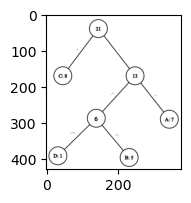

In [5]:
from matplotlib import pyplot as plt
im = plt.imread("img/graph.png")
fig, ax = plt.subplots(figsize=(4, 2))
ax.imshow(im)
plt.show()

<li> Assigna un codi a cada fulla de l'arbre de la forma següent: sempre que descendeixis a un node de la dreta utilitza el caràcter '.' i al descendir al node de l'esquerra utilitza el caràcter '-'.
        <li>Retorna aquesta assignació com a diccionari.
    </ol>
    <h2>3.2 Codificar i decodificar</h2>
    <ol>
        <li>Crea una funció <code>encode</code> que utilitzi el diccionari retornat anteriorment per a codificar un text d'entrada
        <li>Crea una funció <code>decode</code> que utilitzi el diccionari retornat anteriorment per a decodificar un text d'entrada
        <li>Executa la funció <code>alphabet</code> i comprova que el resultat sigui l'esperat.
    </ol>

Exemple d'execució:

- Text a codificar: ABABAC
- Diccionari de freqüències: {'A': 3, 'B': 2, 'C': 1}
- Diccionari de conversió: {'C': '--', 'B': '-.', 'A': '.'}
- Codificat: .-..-..--
- Decodificat: ABABAC

In [8]:
from collections import defaultdict

def compute_frequency(text):
    """
    Params
    ======
    :text: El text que volem codificar
    
    Returns
    =======
    :dct: Un diccionari amb el nombre de cops que apareix cada simbol en el text d'entrada. Per exemple: {'A': 3, 'B': 2, 'C': 1}
    """
    
    dct = defaultdict(int)
    paraules = list(text)
    for i in paraules:
        dct[i] += 1
    return dct

In [9]:
class Node:
    """
    Aquesta classe emmagatzema la informació dels nodes de l'arbre binari.
    """
    def __init__(self, node, value, left=None, right=None):
        self.node = node    # String que representa el node
        self.value = value  # Valor de freqüència
        self.left = left    # Node de l'esquerra
        self.right = right  # Node de la dreta
        self.code = ''      # Codificació del node

    def set_code(self, code):
        self.code = code
    
    def __repr__(self):
        return f"Node({self.node},{self.value},{self.code})"
    
# Creem a part la funcio que verifica si un node te fills o no (es fulla)
    def isLeaf(self):
        if self.left == None and self.right == None:
            return True
        else:
            return False

In [10]:
def assign_recursive(node, codes, codification):
    #si el node es fulla ja estem, completem la codificació
    if node.isLeaf():
        codes[node.node] = codification + node.code
    else:
        if node.left.isLeaf():
            assign_recursive(node.left, codes, codification) #següent es fulla, no cal afegir cap simbol més
        else:
            assign_recursive(node.left, codes, codification + '-')#a l'esquerra posem -
        if node.right.isLeaf():
            assign_recursive(node.right, codes, codification) #següent es fulla, no cal afegir cap simbol més
        else:
            assign_recursive(node.right, codes, codification + '.')#a la dreta s'afegix .
        
    return codes


def assign_codes(text, counts):   
    """
    Aquesta funció construeix el diccionari de conversió de lletres a símbols '.' i '-'.
    
    Params
    ======
    :text: El text que volem convertir
    :counts: El diccionari de freqüències que ens retorna la funció compute_frequency
    
    Returns
    =======
    :codes: El diccionari de conversió. Per exemple: {'C': '--', 'B': '-.', 'A': '.'}
    """
    
    codes = {}
    
    #Assignem lol diccionari en les freqüencies de paraules
    counts = compute_frequency(text)
    
    #Com deia l'enunciat, creem una node list a partir de classe node que rep parametres paraule i freq.
    nodes_list = [Node(char, freq) for char, freq in counts.items()]
    
    while len(nodes_list) > 1:
        #1r Ordenem de més petit a més gran
        nodes_list.sort(key=lambda node: node.value)
        
        #Treiem los dos nodes de la llista que tenen freqüència més baixa
        node_left = nodes_list.pop(0)
        node_right = nodes_list.pop(0)
        
        #los hi assignem el caràcter corresponent (Per aixo en la crida recusiva quan arribem a l'ultim no afegim, ya lo tenen)
        node_left.set_code('-')
        node_right.set_code('.')
        
        #Assignem los dos nodes al pare, que te com a valor la suma de les freqüències dels dos fills
        node_pare = Node('', node_left.value+node_right.value, node_left, node_right)
        
        #Guardem lo node pare a la nodes_list:
        nodes_list.append(node_pare)
        
    root = nodes_list[0] #Ultim element de la llista la root, node de dalt de tot en valor (#paraules del text)
    codes = assign_recursive(root, codes, '')#Cridema a la funcio recursiva que va baixant i augmentant codificació
    
    
    return codes

In [11]:
def encode(text, diccionari):
    """
    Donat un text a codificar i un diccionari de conversió, codifica el text.
    
    Params
    ======
    :text: El text que volem codificar
    :diccionari: El diccionari de conversió que farem servir
    
    Returns
    =======
    :code: Una representació del text usant només els caràcters '.' i '-'
    """
    
    code = ""
    for char in text:
        code += diccionari[char] #cada lletra es la clau del diccionari que te assignada la seua codificació
    
    return code

In [12]:
import math

def decode(text, diccionari):
    """
    Donat un text a decodificar i un diccionari de conversió, decodifica el text.
    
    Params
    ======
    :text: El text que volem decodificar (caràcters '.' i '-')
    :diccionari: El diccionari de conversió que hem fet servir per codificar
    
    Returns
    =======
    :code: El text resultant de la decodificació.
    """
    #analoga a encode pero ara a partir
    
    decode = ""
    while len(text) > 0:
        for letter, code in diccionari.items(): #comparem cada entrada del text amb cada codificacio del diccionari
            if text.startswith(code):  #quan troba coincidencia posa de codi, posa la lletra corresponent
                decode += letter
                text = text[len(code):] #reinicia el proces a partir d'aquell troset de codi
    
    
    return decode

In [13]:
def alphabet(text):
    """
    Funció per comprovar que el codi s'executa correctament. No modifiqueu aquesta funció.
    
    Params
    ======
    :text: Missatge que volem fer servir per provar les funcions.
    """
    
    print("Text a codificar:", text)
    
    counts = compute_frequency(text)
    print("Diccionari de freqüències:", counts)
    
    codes = assign_codes(text, counts)
    print("Diccionari de conversió:", codes)
    
    codi = encode(text, codes)
    print("Codificat:", codi)
    print("Decodificat:", decode(codi, codes))

In [14]:
text_a_codificar = "ABABAC"
alphabet(text_a_codificar)

Text a codificar: ABABAC
Diccionari de freqüències: defaultdict(<class 'int'>, {'A': 3, 'B': 2, 'C': 1})
Diccionari de conversió: {'A': '-', 'C': '.-', 'B': '..'}
Codificat: -..-..-.-
Decodificat: ABABAC


In [15]:
text_a_codificar2 = "VISCAXERTA"
alphabet(text_a_codificar2)

Text a codificar: VISCAXERTA
Diccionari de freqüències: defaultdict(<class 'int'>, {'V': 1, 'I': 1, 'S': 1, 'C': 1, 'A': 2, 'X': 1, 'E': 1, 'R': 1, 'T': 1})
Diccionari de conversió: {'S': '---', 'C': '--.', 'X': '-.-', 'E': '-..', 'R': '.--', 'T': '.-.', 'A': '..-', 'V': '...-', 'I': '....'}
Codificat: ...-....-----...--.--...--.-...-
Decodificat: VISCAXERTA


In [16]:
text_a_codificar2 = "VISCASANTMARTI"
alphabet(text_a_codificar2)

Text a codificar: VISCASANTMARTI
Diccionari de freqüències: defaultdict(<class 'int'>, {'V': 1, 'I': 2, 'S': 2, 'C': 1, 'A': 3, 'N': 1, 'T': 2, 'M': 1, 'R': 1})
Diccionari de conversió: {'A': '--', 'R': '-.-', 'I': '-..', 'S': '.--', 'T': '.-.', 'V': '..--', 'C': '..-.', 'N': '...-', 'M': '....'}
Codificat: ..---...--..-.--.----...-.-.....---.-.-.-..
Decodificat: VISCASANTMARTI
